# 프로젝트 목적

패스트캠퍼스 온라인 강의 결제 내역 데이터를 보고 데이터 사이언스가 되었다고 가정하여 데이터를 분석해 본다.

## 데이터 보기 전 분석해 볼 것 생각해보기

01 고객군 분석 : 패스트캠퍼스에서 강의를 구매하는 사람들은 어떤 그룹으로 분류되며 어떤 특징을 가질 것인가?
사용할 컬럼 : course_title, category_title, subcategory_title 


02 콘텐츠 기획 분석 : 사람들은 어떤 콘텐츠를 많이 구매할까요? 마케팅 효과가 있는지, 특정 그룹의 상품이 효과가 있는지 등을 확인해보세요.

03

04

05

In [ ]:
# 문장 분리용

# 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/220509 mini project/파이널프로젝트_RAW_210329_210926.xlsx')
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


## 데이터 설명 및 가설 설정

  id :

  customer_id :

  course_id :

  type :

  state :

  course_title :

  category_title :

  format :

  completed_at :

  transaction_amount

  coupon_title

  coupon_dicount_amount

  sale_price

  tax_free_amount

  pg

  method

  subcategory_title

  marketing_start_at





## 칼럼명 변경하기

In [ ]:
df.rename(columns = {' ':' '},inplace = True)

# EDA

실제 데이터를 뜯어보아서 목적에 영향을 낄칠 데이터와 아닌 것을 잡는 과정

In [7]:
#데이터 타입 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [8]:
#기초 통계량 확인

data.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054190e+05,105416.000000,100212.000000,1.054190e+05,3.181700e+04,1.042910e+05,1.042910e+05
mean,1.147054e+06,417248.252742,203868.586327,1.464814e+05,4.972172e+04,1.610808e+05,1.575551e+05
std,1.125898e+05,206414.496648,1534.583331,7.195061e+05,5.624467e+04,3.955298e+05,3.898133e+05
min,5.679930e+05,16.000000,2516.000000,-4.144074e+06,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.048940e+06,256401.000000,203100.000000,8.350000e+04,2.000000e+04,1.090000e+05,1.090000e+05
50%,1.135186e+06,501046.000000,203787.000000,1.175000e+05,2.100000e+04,1.320000e+05,1.320000e+05
75%,1.240472e+06,566595.000000,204775.000000,1.590000e+05,6.915000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,2.000000e+06,9.094000e+07,9.094000e+07


## 결측치 확인

In [9]:
#결측치 확인
data.isnull().sum().sort_values(ascending=False)

coupon_title              73602
coupon_discount_amount    73602
subcategory_title         19829
marketing_start_at        17979
pg                        15075
method                    13096
course_id                  5207
tax_free_amount            1128
sale_price                 1128
category_title               24
course_title                 16
format                       16
customer_id                   3
id                            0
completed_at                  0
state                         0
type                          0
transaction_amount            0
dtype: int64

In [12]:
#dataframe형식으로 결측치 값과 비율을 출력

raw_info = pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
raw_info = raw_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values(nb)'}))
raw_info = raw_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index={0:'null values (%)'}))

display(raw_info)
display(data[:5])

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
column type,int64,float64,float64,object,object,object,object,object,datetime64[ns],int64,object,float64,float64,float64,object,object,object,datetime64[ns]
null values(nb),0,3,5207,0,0,16,24,16,0,0,73602,73602,1128,1128,15075,13096,19829,17979
null values (%),0.0,0.002846,4.939337,0.0,0.0,0.015178,0.022766,0.015178,0.0,0.0,69.818534,69.818534,1.070016,1.070016,14.300079,12.422808,18.809702,17.0548


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


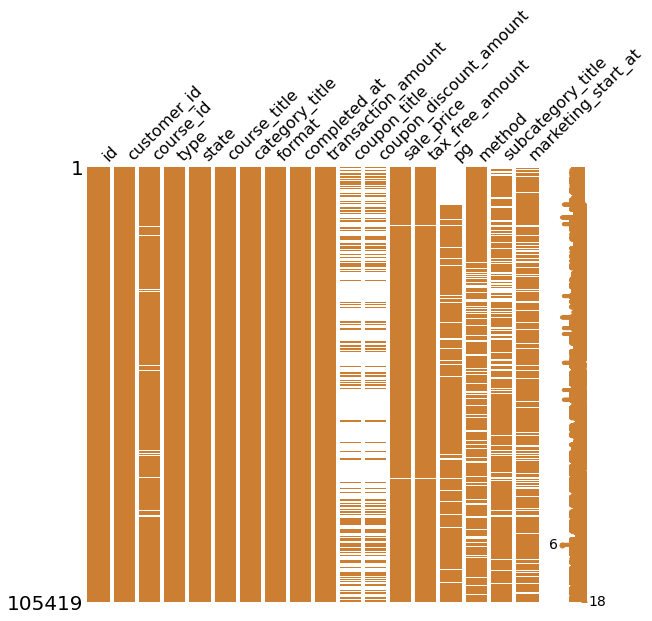

In [11]:
#결측치 시각화
msno.matrix(df=data.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))